## Basic imports 

In [1]:
import sys 
sys.path.append("../")
import barry 
import numpy as np
import matplotlib.pyplot as plt 

## Plot power spectrum with varying Neff 
## - this is to verify Barry is able to get power spectrum with varying Neff 

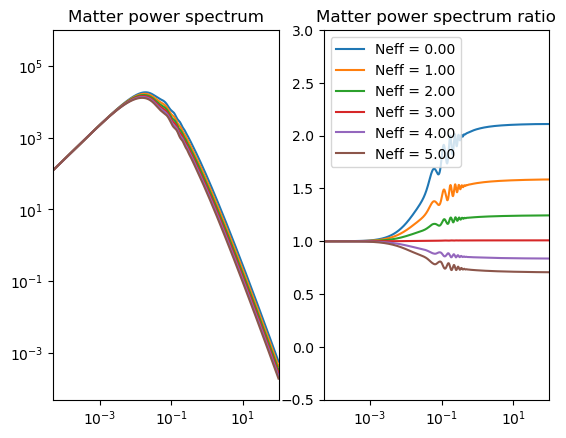

In [57]:
from barry.models import PowerBeutler2017
from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4

# Set up the appropriate model for the power spectrum

model = PowerBeutler2017(
    vary_neff=True,
    isotropic=True,
    recon=None,
    marg="full",
    #fix_params=[],#["om"],
    poly_poles=[0],
    #correction=Correction.NONE,
    n_poly=6,
    #n_data=1,
    #data_share_poly=True
) # setting up choice for BAO model 

cosmology = {
            "om": 0.31,
            "h0": 0.67,
            "z":  0.51,
            "ob": 0.048,
            "ns": 0.97,
            "mnu": 0.0,
            "reconsmoothscale": 15,
            "Neff": 3.044,
        }
model.set_cosmology(cosmology) # initialises self.camb object 
k = model.camb.ks

#model.camb._generate_data() - only needs to be run one time to calculate power spectrum at varying Neff 


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.set_xlim(5e-5, 100)
ax2.set_xlim(5e-5, 100)

ax1.set_ylim(5e-5, 1e6)
ax2.set_ylim(-0.5, 3)


ax1.set_title("Matter power spectrum")
ax2.set_title("Matter power spectrum ratio")

pk_3044 = model.camb.get_data(cosmology["om"], Neff=3.044)

for i in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]:
    
    pk = model.camb.get_data(cosmology["om"], Neff=i) # interpolates for desired Neff and returns power spectrum data 
    # (only works as long as self.cab._generate_data() has been run) 
    
    ax1.loglog(k, pk['pk_lin'], label="Neff = %.2f" % i)
    
    ax2.semilogx(k, pk['pk_lin']/pk_3044['pk_lin'], label="Neff = %.2f" % i)
    
    
plt.legend()


## Plot the BAO model for 
## - smoothed power spectrum 
## - wiggles 
## with the varying choices of Neff 

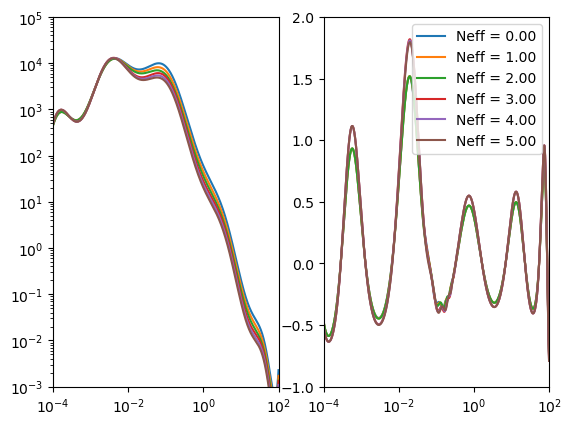

In [58]:

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax2.set_xlim(1e-4, 100)
ax1.set_xlim(1e-4, 100)

ax2.set_ylim(-1, 2)
ax1.set_ylim(1e-3, 1e5)


for i in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]:
    
    pksmooth, pkwiggles = model.compute_basic_power_spectrum(cosmology["om"], Neff=i) # interpolates for desired Neff and returns power spectrum data 
    # (only works as long as self.cab._generate_data() has been run) 
    ax1.loglog(k, pksmooth, label="Neff = %.2f" % i)
    
    ax2.semilogx(k, pkwiggles, label="Neff = %.2f" % i)
    
plt.  
plt.legend()

## Plot the full power spectrum model for the BAOs 

In [60]:
#for i in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]:

ks = model.camb.ks
params_dict = {i.name: i.default for i in model.params}
print(params_dict)
params_dict = model.deal_with_ndata(params_dict, 0)
print(params_dict)
k, pk, poly = model.compute_power_spectrum(ks, params_dict)
    
plt.semilogx(k, pksmooth)
    
plt.legend()

{'b{0}_{1}': 1.0, 'om': 0.31, 'Neff': 3.044, 'alpha': 1.0, 'phase_shift': 1.0, 'sigma_s': 10.0, 'sigma_nl': 10.0, 'a{0}_{1}_{1}': 0.0, 'a{0}_{2}_{1}': 0.0, 'a{0}_{3}_{1}': 0.0, 'a{0}_{4}_{1}': 0.0, 'a{0}_{5}_{1}': 0.0, 'a{0}_{6}_{1}': 0.0}
{'b{0}_{1}': 1.0, 'om': 0.31, 'Neff': 3.044, 'alpha': 1.0, 'phase_shift': 1.0, 'sigma_s': 10.0, 'sigma_nl': 10.0, 'a{0}_{1}_{1}': 0.0, 'a{0}_{2}_{1}': 0.0, 'a{0}_{3}_{1}': 0.0, 'a{0}_{4}_{1}': 0.0, 'a{0}_{5}_{1}': 0.0, 'a{0}_{6}_{1}': 0.0, 'b{0}': 1.0, 'a{0}_{1}': 0.0, 'a{0}_{2}': 0.0, 'a{0}_{3}': 0.0, 'a{0}_{4}': 0.0, 'a{0}_{5}': 0.0, 'a{0}_{6}': 0.0}


KeyError: 'a0_{1}'

In [ ]:
## 